In [40]:
import tarfile
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [30]:
def unpickle(file):
    with open(file, 'rb') as fo:
        data = pickle.load(fo, encoding='bytes')
    return data

# Extract the CIFAR-10 dataset from the tar file
archive_path = "cifar-10-python.tar.gz"
with tarfile.open(archive_path, 'r:gz') as tar:
    tar.extractall()

In [31]:
train_data = []
train_labels = []
for i in range(1, 6):  # There are 5 training batches
    data_batch = unpickle(f"cifar-10-batches-py/data_batch_{i}")
    train_data.append(data_batch[b'data'])
    train_labels += data_batch[b'labels']
train_data = np.concatenate(train_data, axis=0)

In [32]:
test_batch = unpickle("cifar-10-batches-py/test_batch")
test_data = test_batch[b'data']
test_labels = test_batch[b'labels']

In [38]:
train_data, val_data, train_labels, val_labels = train_test_split(
    train_data, train_labels, test_size=0.2, random_state=42
)

20480 20480


KNeighborsClassifier()

In [44]:
n_neighbors_values = [1, 2, 5, 10, 50, 100, 110]
for n_neighbors in n_neighbors_values:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(train_data, train_labels)
    accuracy = knn.score(val_data, val_labels)
    print(f"Validation Accuracy: {accuracy:.4f}")

Validation Accuracy: 0.3309
Validation Accuracy: 0.2863
Validation Accuracy: 0.3148
Validation Accuracy: 0.3189
Validation Accuracy: 0.3123
Validation Accuracy: 0.2904
Validation Accuracy: 0.2906


(0.0, 0.7493554687499999)

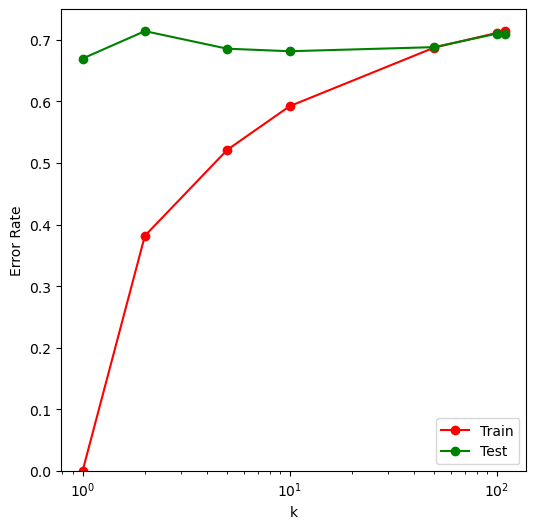

In [43]:

figure, axes = plt.subplots(1, figsize=(6,6))
k_vals = [1,2,5,10,50,100,110]

err_tr = np.zeros(len(k_vals))
err_te = np.zeros(len(k_vals))

for i, k in enumerate(k_vals):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data, train_labels)
    yhat_tr = knn.predict(train_data)
    yhat_te = knn.predict(val_data)
    err_tr[i] = 1. - accuracy_score(train_labels, yhat_tr)
    err_te[i] = 1. - accuracy_score(val_labels, yhat_te)
axes.semilogx(k_vals, err_tr, marker='o', c='red', label='Train')
axes.semilogx(k_vals, err_te, marker='o', c='green', label='Test')
(0.0, 0.2808139534883721)
axes.set_xlabel('k')
axes.set_ylabel('Error Rate')
axes.legend()
axes.set_ylim((0,None))